# World Happiness Report 2021 EDA
## This notebook goes through a basic exploratory data analysis of the Kaggle Dataset "World Happiness Report 2021" with Python

In this notebook I want to explore the dataset of the World Happiness Report 2021. At the beginning I will do a basic exploratory data analysis (EDA). The plan is to use (and practise) Seaborne for visualizing some of the data points and check for possible connections between the individual data points. 


## Contents

will be updated later


## Step 0: Why EDA?

update before sending out


## Step 1: Download the data

The data for this notebook comes from Ajaypal Singh on kaggle and can be found here: 
https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021


## Step 2: Working through the dataset


### 2.1: Loading Dependencies


In [2]:
# Import Dependencies
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #More than one output per code cell in Jupyter (1/2)
InteractiveShell.ast_node_interactivity = "all"

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### 2.2: Loading in the data

I've stored the downloaded raw data from kaggle at `~/Projects/World_Happiness_Report_2021/raw`
Now I will load the data into this notebook to be able to actually work on it


In [10]:
# Import both csv files from the zip file

df = pd.read_csv('~/Projects/World_Happiness_Report_2021/raw/world-happiness-report.csv')
df2 = pd.read_csv('~/Projects/World_Happiness_Report_2021/raw/world-happiness-report-2021.csv')
pop = pd.read_csv('~/Projects/World_Population_2021/2021_population.csv')


# Renaming columns for easier workflow
df.rename(columns={'Country name': 'Country'}, inplace=True)
df2.rename(columns={'Country name': 'Country'}, inplace=True)
pop.rename(columns={'country': 'Country'}, inplace=True)

### 2.3: Descriptive statistics

With all the data loaded into the notebook I will have a first glance of it's contents. My main questions here are:
1. How are the csv files structured and what data do they contain? (why are there two csv's with a similar name and what is the difference?)
2. Is there missing data?


(1949, 11)

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Country                              object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

<AxesSubplot:>

Country                               0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

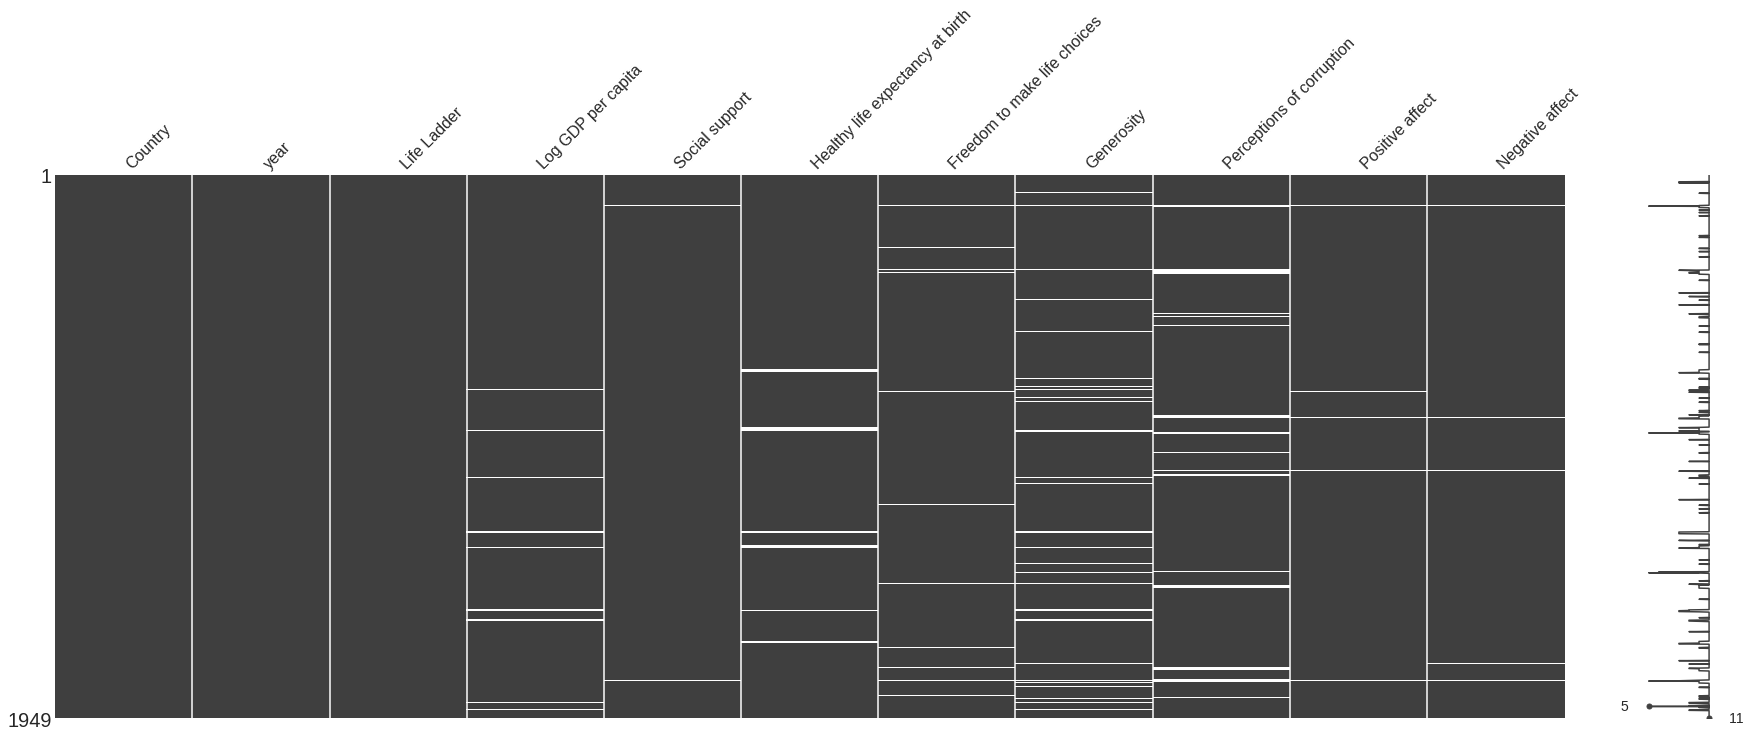

In [11]:
# View world-happiness-report.csv (df)

# 1. How is the data structured and what data is contained?
df.shape #Shape of table (rows and columns)
df.head() #First 5 rows including content
df.dtypes #Datatypes within the Dataset

# 2. Is there missing data?
missingno.matrix(df, figsize = (30,10))

df.isna().sum()


(149, 20)

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Country                                        object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

<AxesSubplot:>

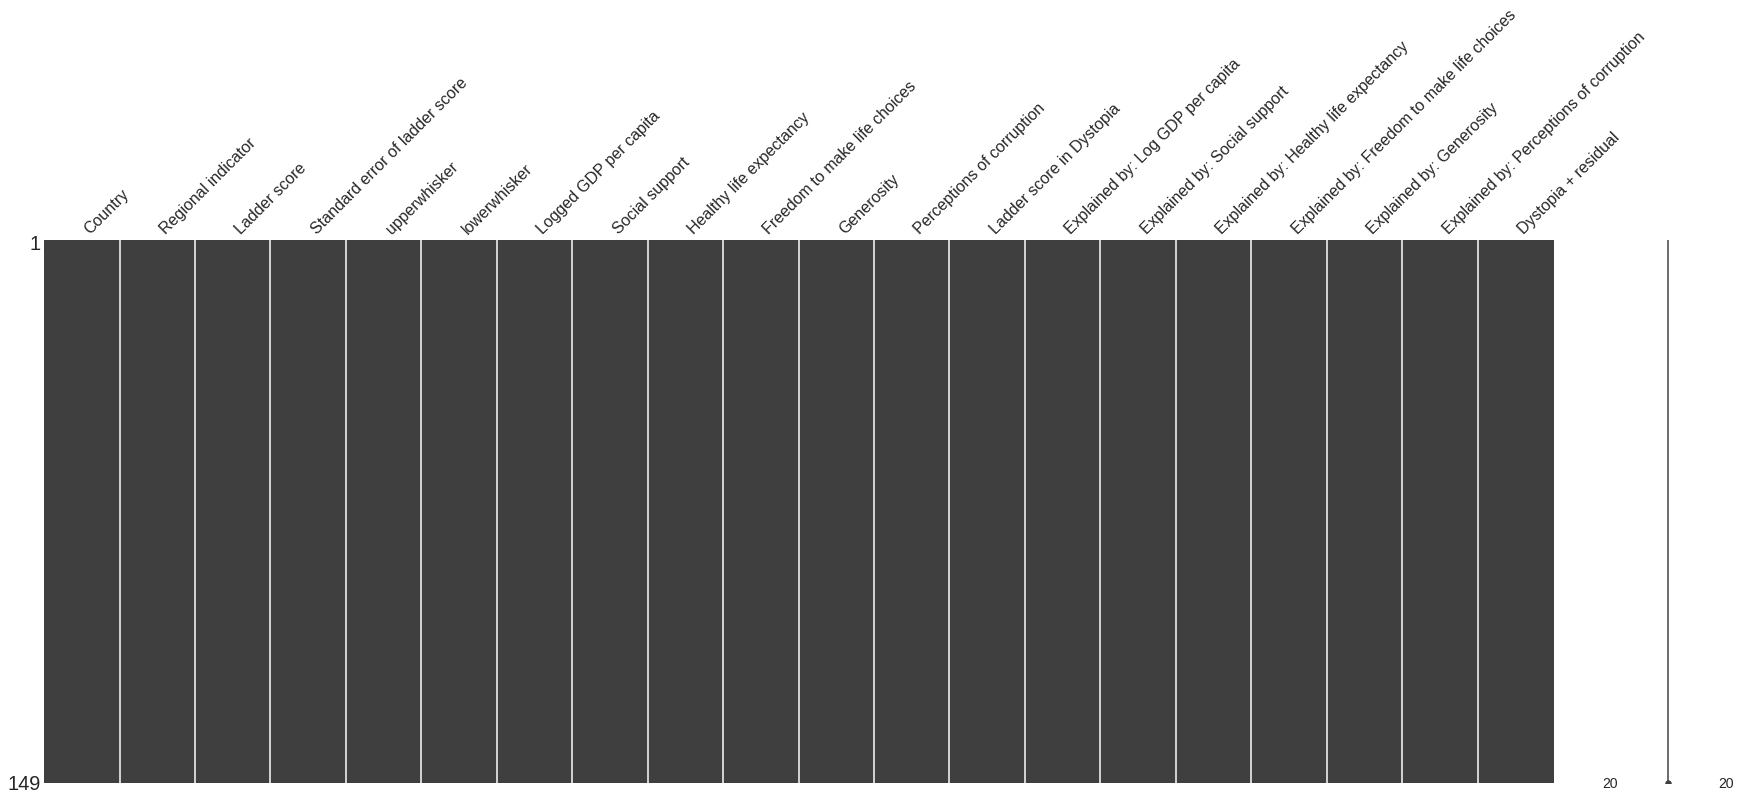

In [12]:
#View world-happiness-report-2021.csv (df2)

df2.shape #Shape of table (rows and columns)
df2.head() #First 5 rows including content
df2.dtypes

#Missing data?
missingno.matrix(df2, figsize = (30,10))


What did we learn from the descriptive statistics?
1. How are the csv files structured and what data do they contain? (why are there two csv's with a similar name and what is the difference?)<br>
⮕ The difference between the two data frames is that one contains only data from 2021 while the other one contains the data over several years<br>
⮕ df1 contains a lot more rows than df2 due to the scores of several years at once<br>
⮕ There is some missing data in df (see summary above)<br>
⮕ <b> There is no population data in the two data sets which could give interesting insights into the happiness data. I found the matching file also on kaggle under the following link:</b>  https://www.kaggle.com/rsrishav/world-population 


In [13]:
#Importing world population data, to keep the code clean I added the line to the other imports


#Quick look into the data set to check if import worked and to give a quick overview over the contained data
pop.shape
pop.head()
pop.dtypes

(228, 9)

,iso_code,Country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,443,866,278","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,392,438,885","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"332,774,692","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,156,067","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"224,889,934","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


iso_code             object
Country              object
2021_last_updated    object
2020_population      object
area                 object
density_sq_km        object
growth_rate          object
world_%              object
rank                  int64
dtype: object


Numerical values are recorded as strings which should be converted to integers. After that I can check the descriptive statistics of the countries.


In [14]:
pop['2021_last_updated'] = pop['2021_last_updated'].apply(lambda x : int(str(x).replace(',','')))
pop['2020_population'] = pop['2020_population'].apply(lambda x : int(str(x).replace(',','')))
pop['density_sq_km'] = pop.density_sq_km.apply(lambda x : int(str(x).replace(',','')[:-6]))
pop['growth_rate'] = pop.growth_rate.apply(lambda x : float(str(x)[:-2]))
pop['world_%'] = pop['world_%'].apply(lambda x : float(str(x)[:-2]))
pop.describe()

,2021_last_updated,2020_population,density_sq_km,growth_rate,world_%,rank
count,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000
mean,3.450464e+07,3.417852e+07,456.219298,1.036842,0.407018,115.311404
std,1.379485e+08,1.370800e+08,2096.330128,1.042089,1.748037,67.032535
min,8.000000e+02,8.010000e+02,0.000000,-1.200000,0.000000,1.000000
25%,5.569310e+05,5.521262e+05,35.750000,0.275000,0.000000,57.750000
50%,5.852478e+06,5.821272e+06,95.500000,0.900000,0.000000,114.500000
75%,2.208145e+07,2.201413e+07,240.000000,1.800000,0.225000,172.250000
max,1.443866e+09,1.439324e+09,21946.000000,4.400000,18.300000,232.000000


## Step 3: Analyzing/ first implications

### 3.1: What are the happiest/ least happiest countries?

In [19]:
past_winners = df.loc[df.groupby("year")["Life Ladder"].idxmax()]
past_bottom = df.loc[df.groupby("year")["Life Ladder"].idxmin()]

hap = df2.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]
unhap = df2.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]
top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(2.49777, 0, 'Afghanistan')

Text(3.11355, 1, 'Zimbabwe')

Text(3.38085, 2, 'Rwanda')

Text(3.43233, 3, 'Botswana')

Text(3.47688, 4, 'Lesotho')

Text(3.564, 5, 'Malawi')

Text(3.57885, 6, 'Haiti')

Text(3.58677, 7, 'Tanzania')

Text(3.62142, 8, 'Yemen')

Text(3.73725, 9, 'Burundi')

Text(7.19532, 10, 'Austria')

Text(7.20423, 11, 'New Zealand')

Text(7.25076, 12, 'Luxembourg')

Text(7.289370000000001, 13, 'Sweden')

Text(7.31808, 14, 'Norway')

Text(7.389360000000001, 15, 'Netherlands')

Text(7.47846, 16, 'Iceland')

Text(7.49529, 17, 'Switzerland')

Text(7.5438, 18, 'Denmark')

Text(7.763579999999999, 19, 'Finland')

Text(2.49777, 0, 'Afghanistan')

Text(3.11355, 1, 'Zimbabwe')

Text(3.38085, 2, 'Rwanda')

Text(7.49529, 17, 'Switzerland')

Text(7.5438, 18, 'Denmark')

Text(7.763579999999999, 19, 'Finland')

[]

[]

Text(0, 22.5, 'The Happiest & Unhappiest Countries in the World')

Text(0, 21.3, 'We will investigate how these countries differ, and whether or not population\nhas anything to do with it')

Text(6, 4.5, '7 of the bottom 10\nare in Africa')

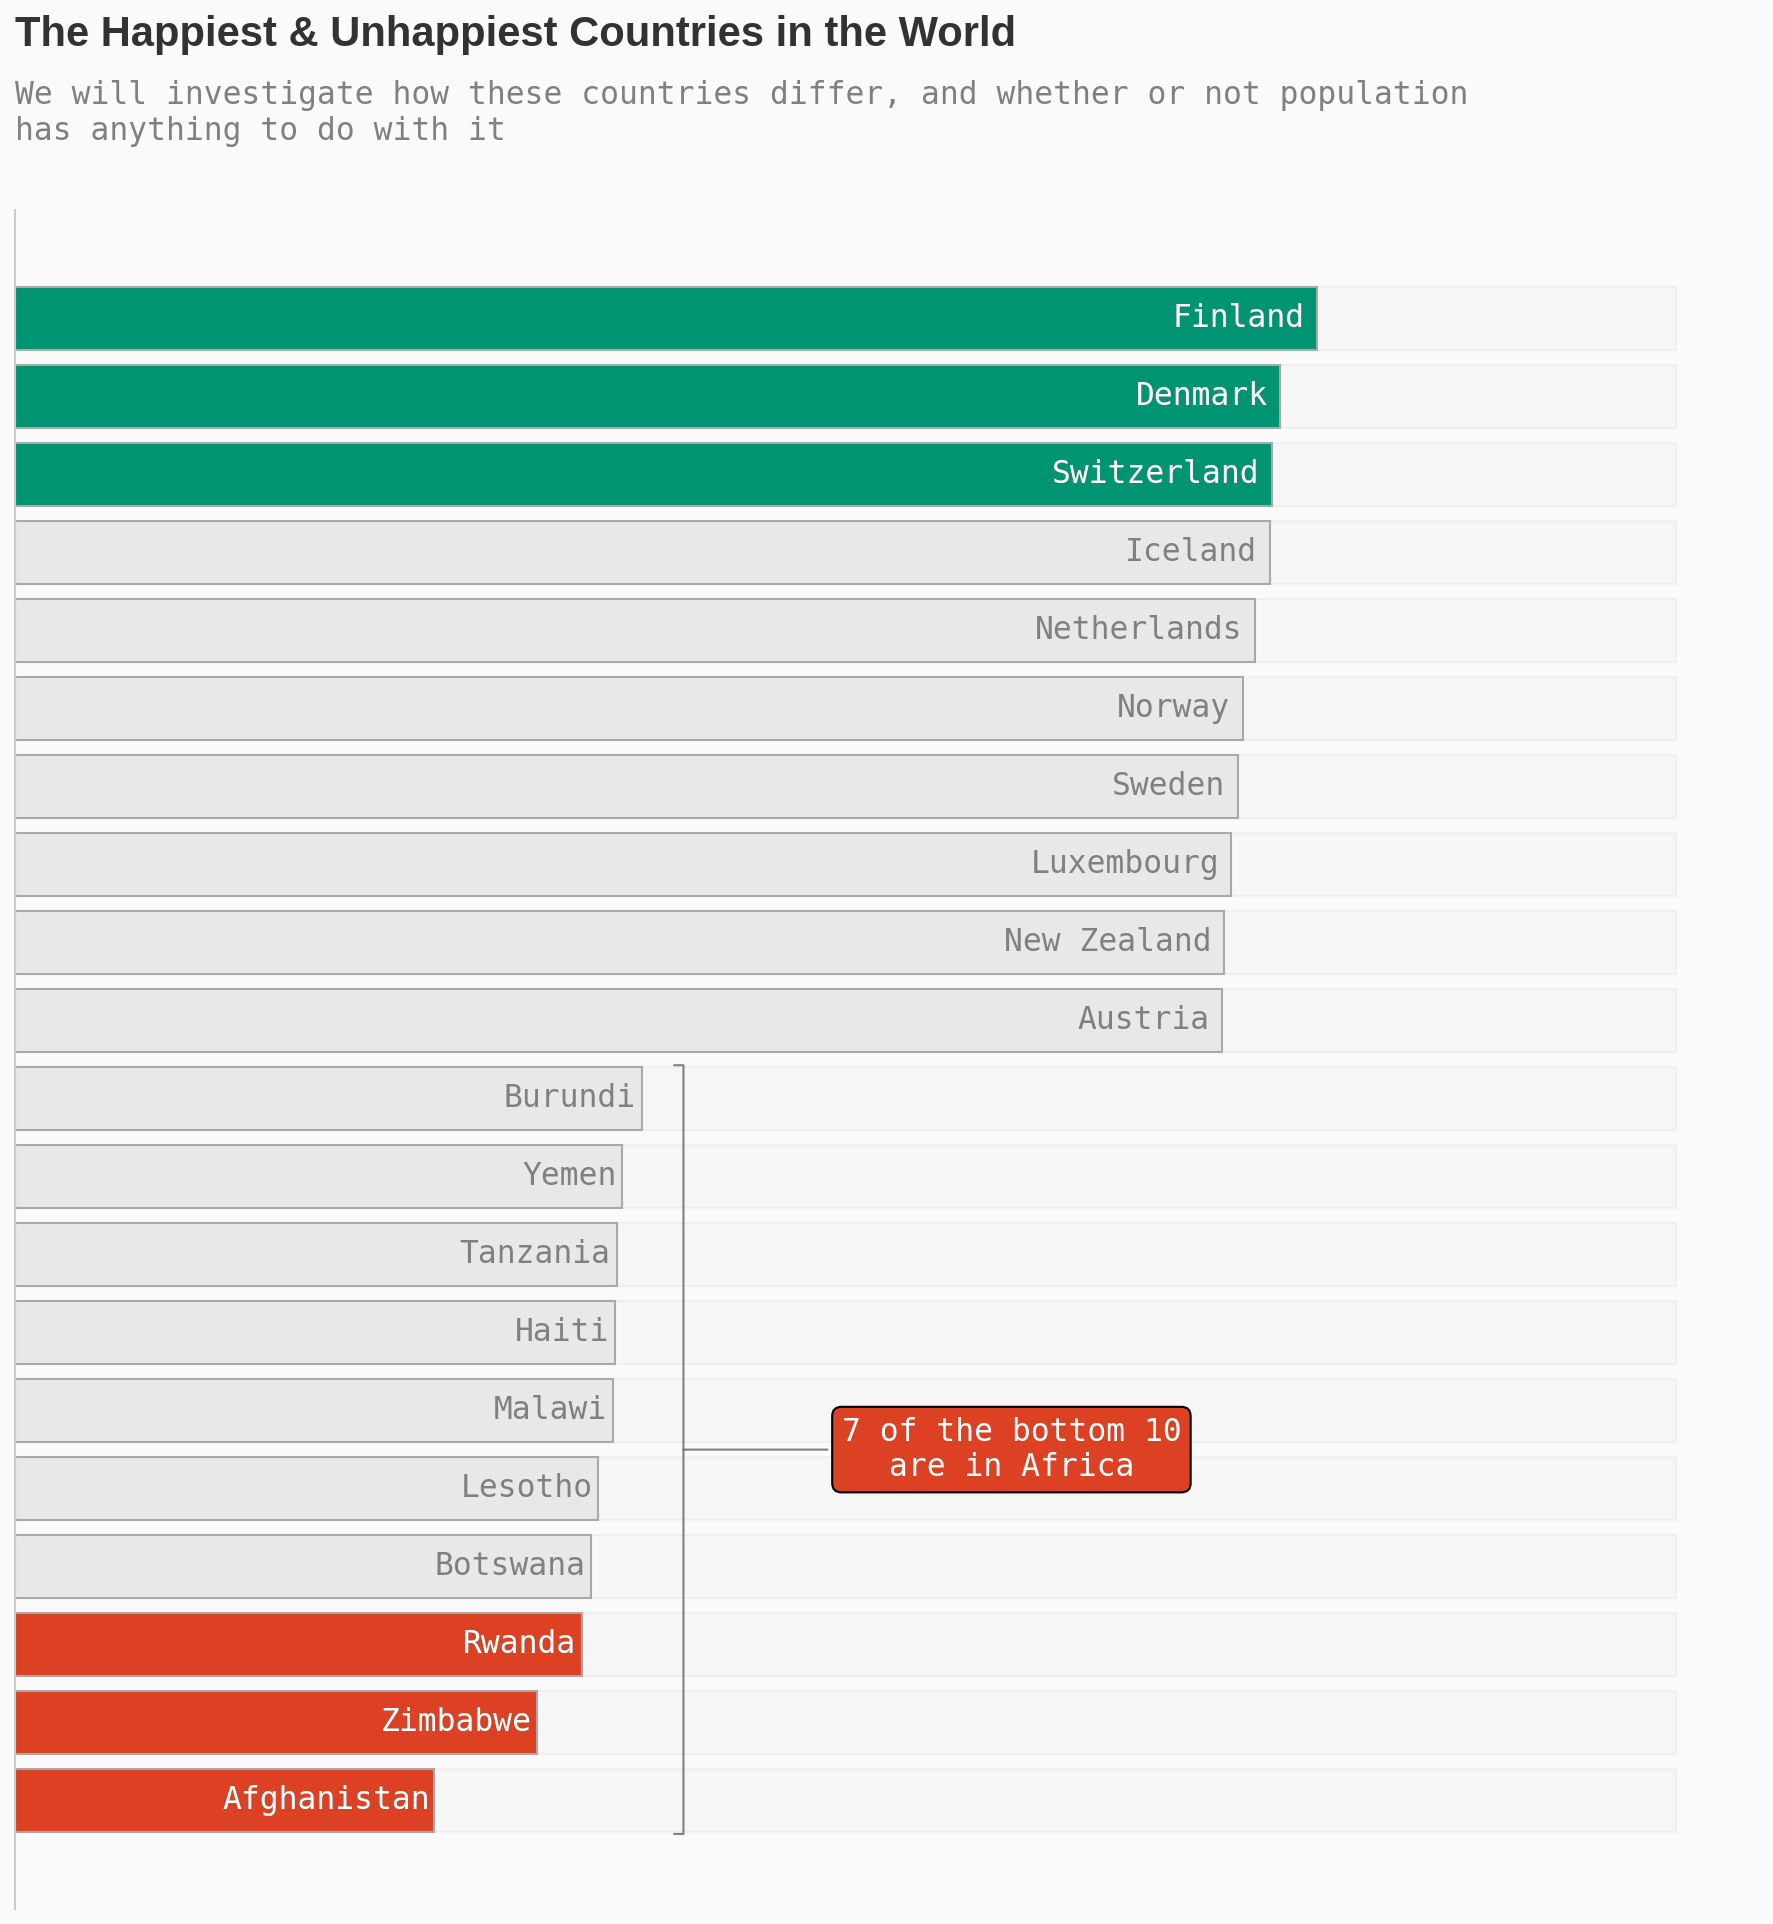

In [21]:
# Code for really nice graphic for the top 10 from the notebook of Josh (link notebook:https://www.kaggle.com/joshuaswords/awesome-eda-2021-happiness-population link kaggle profile: https://www.kaggle.com/joshuaswords)

# Colours for graph:
low_c = '#dd4124'
high_c = '#009473'
plt.rcParams["font.family"] = "monospace"

# Code for graph:
fig = plt.figure(figsize=(15,15),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 


# Plots 
# Happiest
data = top_bottom

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c 
#base
ax0.barh(data.index, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)

for i in range(0,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)

for i in range(17,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])



for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,22.5,'The Happiest & Unhappiest Countries in the World',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,21.3,'We will investigate how these countries differ, and whether or not population\nhas anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

ax0.annotate('7 of the bottom 10\nare in Africa', xy=(4, 4.5), xytext=(6, 4.5), xycoords='data', 
            fontsize=15, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc=low_c),
            arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')

plt.show()

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(7.763579999999999, 0, 'Finland')

Text(7.5438, 1, 'Denmark')

Text(7.49529, 2, 'Switzerland')

Text(7.47846, 3, 'Iceland')

Text(7.389360000000001, 4, 'Netherlands')

Text(7.31808, 5, 'Norway')

Text(7.289370000000001, 6, 'Sweden')

Text(7.25076, 7, 'Luxembourg')

Text(7.20423, 8, 'New Zealand')

Text(7.19532, 9, 'Austria')

Text(7.763579999999999, 0, 'Finland')

Text(7.5438, 1, 'Denmark')

Text(7.49529, 2, 'Switzerland')

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(3.38085, 7, 'Rwanda')

Text(3.11355, 8, 'Zimbabwe')

Text(2.49777, 9, 'Afghanistan')

Text(3.73725, 0, 'Burundi')

Text(3.62142, 1, 'Yemen')

Text(3.58677, 2, 'Tanzania')

Text(3.57885, 3, 'Haiti')

Text(3.564, 4, 'Malawi')

Text(3.47688, 5, 'Lesotho')

Text(3.43233, 6, 'Botswana')

(0.0, 10.0)

(10.0, 0.0)

[]

[]

[]

[]

Text(0, 10.8, 'The Happiest & Unhappiest Countries in the World: Side-by-side')

Text(0, 10.3, 'We will investigate how these countries differ, and whether or not population has anything to do with it')

Text(0.53, 0.72, '\nWhat makes these \ncountries appear \nat the bottom of\nthe list?\n\n')

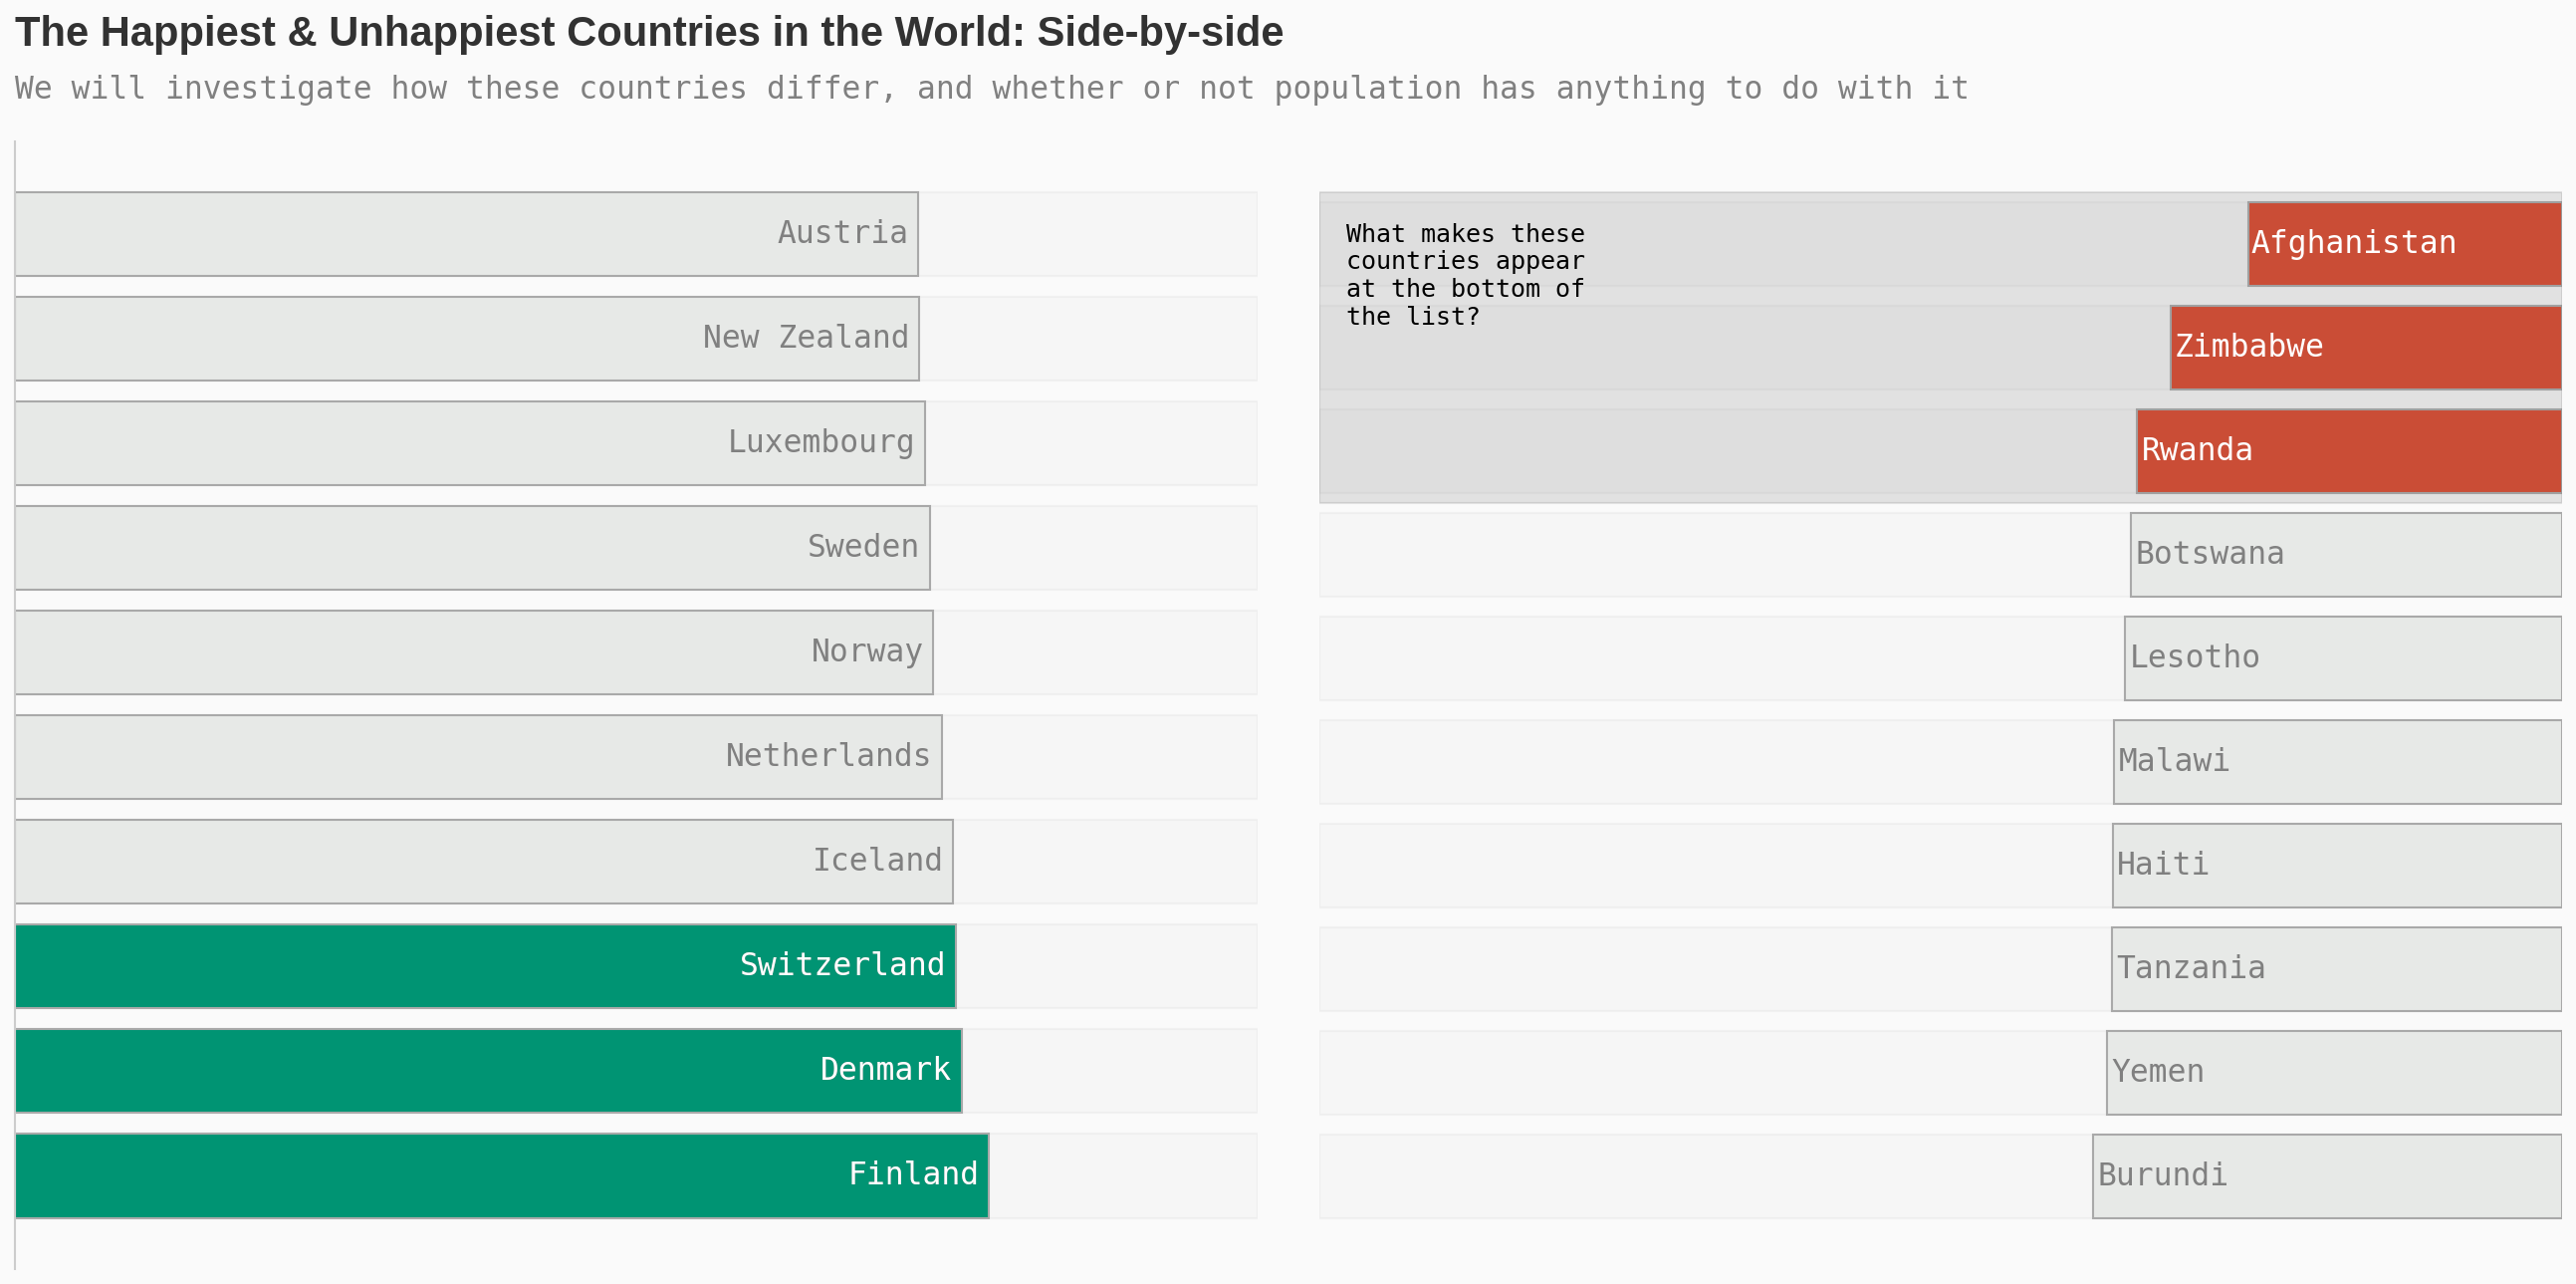

In [26]:
# Same info in different view, same source for code, beautiful graph :) 

fig = plt.figure(figsize=(22,10),dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 


# Plots 
# Happiest
data = df2.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]


color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  high_c # color highlight

#base
ax0.barh(data.index, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)


#annotations
#for i in data.index:
 #   ax.annotate(f"{round(data[i],3)}", 
  #                 xy=(data[i] + 0.5,i), #i like to change this to roughly 5% of the highest cat
   #                va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=12)
for i in range(0,10):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    
# Unhappiest

data = df2.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight

#base
ax1.barh(data.index[::-1], 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax1.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)


#annotations
#for i in data.index:
 #   ax.annotate(f"{round(data[i],3)}", 
  #                 xy=(data[i] + 0.5,i), #i like to change this to roughly 5% of the highest cat
   #                va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=12)
for i in range(7,10):
    ax1.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
# diff color text
for i in range(0,7):
    ax1.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)

    


# Remove border from plot

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom', 'right','left']:    
    ax1.spines[s].set_visible(False)
    


    
ax0.set_xlim(0,10)
ax1.set_xlim(10,0)
    
# ax labels off

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

ax0.text(0,10.8,'The Happiest & Unhappiest Countries in the World: Side-by-side',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,10.3,'We will investigate how these countries differ, and whether or not population has anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

# rect
from matplotlib.patches import Rectangle
X, Y = 0, 6.5


ax1.add_patch(Rectangle((X, Y), 10, 3,alpha=0.2, edgecolor='gray',facecolor='gray'))

fig.text(0.53,0.72,
        
'''
What makes these 
countries appear 
at the bottom of
the list?

''',color='black',fontfamily='monospace',fontsize=12)


plt.show()
